## Práctica Calificada - Semana 1

Este es el primer entregable calificado. Debe completar todos los ejercicios para obtener un 100% en la calificación. Recuerde que tiene hasta el próximo viernes a medianoche para entregar el ejercicio en el aula virtual. 

Forma de entrega: por favor coloque el archivo Practica-Semana1-ipynb en un .zip con el figuiente formato:
- primera-letra-nombre.apellido-semana.zip 
- (por ejemplo, Juan Zamora debe entregar el archivo j.zamora-1.zip) La tarea debe subirse al aula virtual.


In [126]:
# 1 [COMPLETE] - imports: ponga todos sus imports en esta seccion: (1pt)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#from scipy.stats import zscore
from scipy import stats

In [127]:
# utilizaremos Pandas para cargar los datos de un CSV
link = 'https://raw.githubusercontent.com/agomezs/programa-ia/main/S1-RegresionLinealSimple/data/precios-casas-1.csv?token=AB6W5JVSJRZOC7FJK3CDG6S7YW7ZG'
data = pd.read_csv("data/precios-casas-1.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Ajuste

In [128]:
# AJUSTE [COMPLETE] (1pt)
# Las indicaciones estan en la Parte 3. (no resuelva esto sin haber completado 
# la Parte 1 y 2)

# el ajuste debe realizarse sobre la variable data.

index_to_remove = data.sort_values(by=['sqft_living'], ascending=False).head(1).index

data.drop(index_to_remove, inplace=True)

# # quita todos los outliers
# result1 = data[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
# result1.info()

In [129]:
# 2 [COMPLETE] (1pt)
# - separe el dataset (data) en train (con 80%) y test set (con 20%) de los datos
# y = precio, X = sqft_living
X = data['sqft_living']
y = data['price']
sqr_train, sqr_test, price_train, price_test = train_test_split(X, y, test_size=0.20, random_state=42)

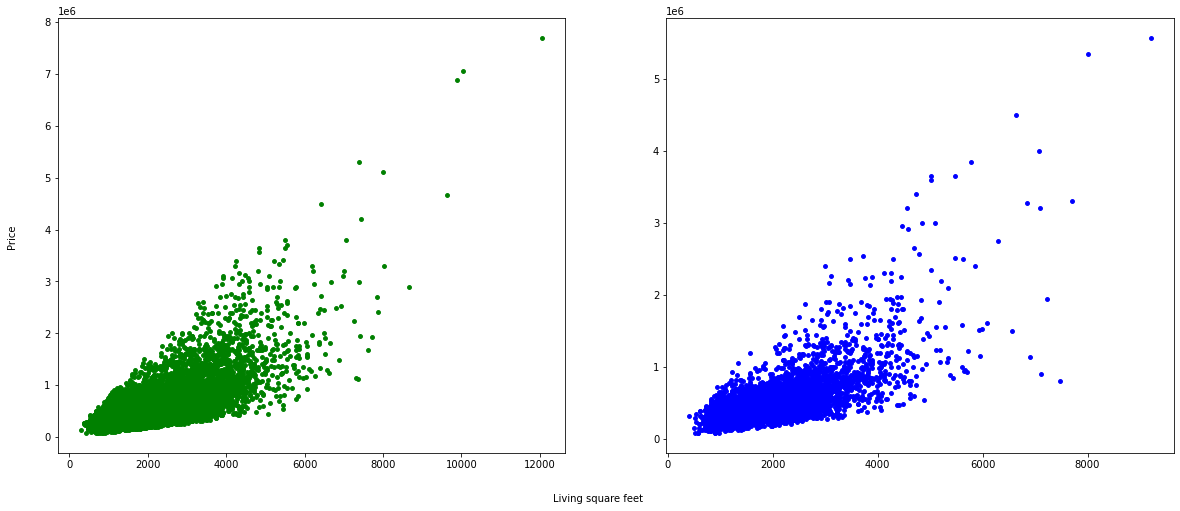

In [130]:
# 3 [COMPLETE] (3pt)
# despliegue el train set y el test set con matplotlib. Despliegue los charts usando
# scatter plots con puntos verdes para el training set y azules para el test set.
# ambos charts deben desplegarse de forma horizonal (uno al lado del otro)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.scatter(sqr_train, price_train, marker = ".", s = 60, c = "green")
ax2.scatter(sqr_test, price_test, marker = ".", s = 60, c = "blue")

fig.text(0.5, 0.04, 'Living square feet', ha='center')
fig.text(0.09, 0.5, 'Price', va='center', rotation='vertical')

plt.show()


In [131]:
# 4 [COMPLETE] (2pt)
# utilize Sklearn para generar el modelo de regresion lineal sobre el training set.
# imprima el valor de los coeficientes≠
#x = sqr_train

x_train = sqr_train.to_numpy().reshape(-1, 1)
y_train = price_train.to_numpy().reshape(-1, 1)
print('x_train', x_train)
print('y_train', y_train)

model = LinearRegression().fit(x_train, y_train)

x_train [[1780]
 [1430]
 [1990]
 ...
 [2120]
 [ 380]
 [1830]]
y_train [[325000.]
 [485000.]
 [293000.]
 ...
 [575000.]
 [245000.]
 [485000.]]


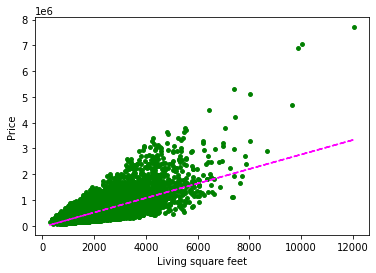

In [132]:
# 5 [COMPLETE] (2pt)
# despliegue con Matplotlib el trainig set y el modelo (funcion de regresion) sobre
# los datos. Aplique el color magenta a la linea de regresion.
plt.scatter(sqr_train, price_train, marker = ".", s = 60, c = "green")
plt.xlabel('Living square feet')
plt.ylabel('Price')

y_prima = model.predict(x_train)
plt.plot(sqr_train, y_prima, 'r--', c = "magenta")

plt.show()


In [133]:
# 6 [COMPLETE] (1pt)
# calcule el MSE del training set
mse_train = mean_squared_error(y_train, y_prima)
print("MSE TRAIN: ", mse_train)

MSE TRAIN:  66901872979.17128


## Parte 2: Test Set

In [134]:
# 7 [COMPLETE] (1pt)
# Aplique el modelo generado (en el paso #4) sobre el test set. 
# Aqui debe generar la prediccion sobre el test set usando el modelo ya generado.
# y_prima_test = modelo.predecir(...)

x_test = sqr_test.to_numpy().reshape(-1, 1)

y_prima_test = model.predict(x_test)

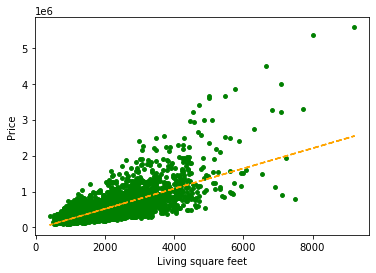

In [135]:
# 8 [COMPLETE] (2pt)
# despliegue con Matplotlib el test set y el modelo (funcion de regresion) sobre
# los datos. Aplique el color naranja a la linea de regresion.
plt.scatter(sqr_test, price_test, marker = ".", s = 60, c = "green")
plt.xlabel('Living square feet')
plt.ylabel('Price')

plt.plot(sqr_test, y_prima_test, 'r--', c = "orange")

plt.show()

In [136]:
# 9 [COMPLETE] (1pt)
# calcule el MSE del test set
y_test = price_test.to_numpy().reshape(-1, 1)
mse_test = mean_squared_error(y_test, y_prima_test)
print("MSE Test: ", mse_test)

MSE Test:  73657279912.95067


## Parte 3: Ajuste del Problema.

In [138]:
# 10 [COMPLETE] (5pt)
# Existe un problema con los datos que afecta el modelo de regresion lineal. 
# Considere eliminar los datos que ud considere que estan dando problemas y
# vuelva a ejecutar los pasos del 1 al 9.
# PISTA: son 2 datos que afectan el modelo...

# es importante que este ajuste se realize en la casilla de AJUSTE, que esta antes
# de la Parte 1.

# antes de realizar el ajuste, salve el MSE_train y el MSE_test en variables para 
# que pueda comparar estos datos despues del ajuste

# Obtenga: 
# MSE_train
# MSE_train_adj
# MSE_test
# MSE_test_adj

MSE_train = 66319347784.51793
MSE_train_adj = 66901872979.17128
MSE_test = 76484977061.77612
MSE_test_adj = 73657279912.95067

print('MS Train Diff:', MSE_train - MSE_train_adj)
print('MS Test  Diff:', MSE_test - MSE_test_adj)


MS Train Diff: -582525194.6533508
MS Test  Diff: 2827697148.8254547
